In [2]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('NYC TLC Trip Record.csv')
display(df.head(),df.tail())

# Background

Industri transportasi perkotaan, khususnya layanan taksi, menghadapi tantangan yang semakin kompleks di kota-kota besar seperti New York. Dengan meningkatnya kompetisi dari layanan ridesharing dan perubahan perilaku konsumen, perusahaan taksi perlu lebih adaptif dalam mengelola operasi mereka. Data perjalanan taksi dari NYC Taxi and Limousine Commission (TLC) menyediakan wawasan penting yang dapat membantu perusahaan taksi memahami pola perjalanan, meningkatkan efisiensi operasional, dan mengoptimalkan kepuasan pelanggan.

Laporan ini berfokus pada analisis data perjalanan yang diambil dari ribuan perjalanan taksi di New York City. Tujuan utamanya adalah untuk mengidentifikasi pola-pola utama dalam jarak perjalanan, durasi perjalanan, dan tarif yang dikenakan. Dengan analisis ini, perusahaan taksi diharapkan dapat menemukan area yang perlu diperbaiki, baik dalam hal manajemen armada maupun penetapan harga, serta meningkatkan kualitas layanan untuk tetap kompetitif dalam industri yang dinamis ini.

## Pernyataan Masalah

1. Efisiensi Operasional: Banyak perjalanan taksi di New York City terjadi pada jam-jam sibuk, menyebabkan waktu tunggu yang lama dan potensi kehilangan pelanggan. Bagaimana perusahaan dapat mengoptimalkan distribusi armada mereka untuk memenuhi permintaan yang tinggi selama jam-jam tertentu?

2. Ketidaksesuaian Tarif: Terdapat variasi yang signifikan dalam tarif yang dikenakan untuk perjalanan dengan jarak yang sama, serta beberapa outlier yang menunjukkan tarif tinggi untuk perjalanan jarak pendek. Bagaimana perusahaan dapat menyesuaikan struktur tarif mereka agar lebih adil dan transparan bagi pelanggan?

3. Peningkatan Kepuasan Pelanggan: Kepuasan pelanggan sangat dipengaruhi oleh durasi perjalanan dan biaya yang dikenakan. Bagaimana perusahaan dapat meningkatkan pengalaman pelanggan dengan mengurangi durasi perjalanan dan memastikan biaya yang dikenakan sesuai dengan jarak yang ditempuh?

# Data Understanding

In [5]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


## Penjelasan setiap variable (Data Dictionary)

|kolom | Penjelasan |
|---- | ---- |
| vendor_id | ID dari penyedia layanan taksi (misalnya, perusahaan taksi)|
| pickup_datetime | Tanggal dan waktu ketika penumpang naik taksi|
| dropoff_datetime | Tanggal dan waktu ketika penumpang turun dari taksi|
| passenger_count | Jumlah penumpang dalam taksi untuk perjalanan tersebut|
| trip_distance | Jarak perjalanan taksi dalam mil atau kilometer|
|rate_code|Kode tarif untuk perjalanan (misalnya, tarif standar, tarif malam, tarif bandara, dll.).
|store_and_fwd_flag| Indikator apakah data perjalanan disimpan sebelum diteruskan ke penyedia layanan karena konektivitas jaringan (misalnya, 'Y' untuk ya, 'N' untuk tidak)|
|payment_type| Metode pembayaran untuk perjalanan (misalnya, kartu kredit, tunai, voucher).|
|fare_amount|Jumlah ongkos perjalanan dalam mata uang USD|
|extra|Biaya tambahan yang mungkin termasuk dalam perjalanan (misalnya, biaya malam, biaya perjalanan jauh).|
|mta_tax | Pajak yang dikenakan oleh MTA|
|tip_amount|Jumlah tip yang diberikan oleh penumpang|
|tolls_amount|Jumlah total tol yang dikenakan selama perjalanan.|
|total_amount|Jumlah total yang harus dibayar untuk perjalanan, termasuk ongkos, pajak, tip, dan tol.|

## Missing Values

In [7]:
df.isnull().sum()
# Jumlah data kosong (NaN) untuk setiap variable

,0
VendorID,0
lpep_pickup_datetime,0
lpep_dropoff_datetime,0
store_and_fwd_flag,4324
RatecodeID,4324
PULocationID,0
DOLocationID,0
passenger_count,4324
trip_distance,0
fare_amount,0


In [8]:
missing = pd.DataFrame({'jumlah':df.isnull().sum().sort_values(ascending = False)})
missing

,jumlah
ehail_fee,68211
trip_type,4334
congestion_surcharge,4324
store_and_fwd_flag,4324
RatecodeID,4324
payment_type,4324
passenger_count,4324
tip_amount,0
total_amount,0
improvement_surcharge,0


In [9]:
total_baris_data = len(df)
missing['persentase %'] = round((missing['jumlah']/total_baris_data)*100,2)
missing

,jumlah,persentase %
ehail_fee,68211,100.00
trip_type,4334,6.35
congestion_surcharge,4324,6.34
store_and_fwd_flag,4324,6.34
RatecodeID,4324,6.34
payment_type,4324,6.34
passenger_count,4324,6.34
tip_amount,0,0.00
total_amount,0,0.00
improvement_surcharge,0,0.00


In [21]:
df_cleaned = df.dropna()

In [23]:
# Check if 'pickup_datetime' and 'dropoff_datetime' columns exist before dropping rows
if 'pickup_datetime' in df.columns and 'dropoff_datetime' in df.columns:
    # Drop rows with missing values in these columns only
    df_cleaned = df.dropna(subset=['pickup_datetime', 'dropoff_datetime'])

    # Ubah kolom tanggal menjadi format datetime
    df_cleaned['pickup_datetime'] = pd.to_datetime(df_cleaned['pickup_datetime'])
    df_cleaned['dropoff_datetime'] = pd.to_datetime(df_cleaned['dropoff_datetime'])

    # Ubah kolom numerik ke tipe yang sesuai
    df_cleaned['passenger_count'] = df_cleaned['passenger_count'].astype(int)
    df_cleaned['trip_distance'] = df_cleaned['trip_distance'].astype(float)
else:
    print("Either 'pickup_datetime' or 'dropoff_datetime' column is missing in the DataFrame.")

Either 'pickup_datetime' or 'dropoff_datetime' column is missing in the DataFrame.


## Data Duplikat

In [10]:
df.duplicated().sum()

0

## Distribusi Data

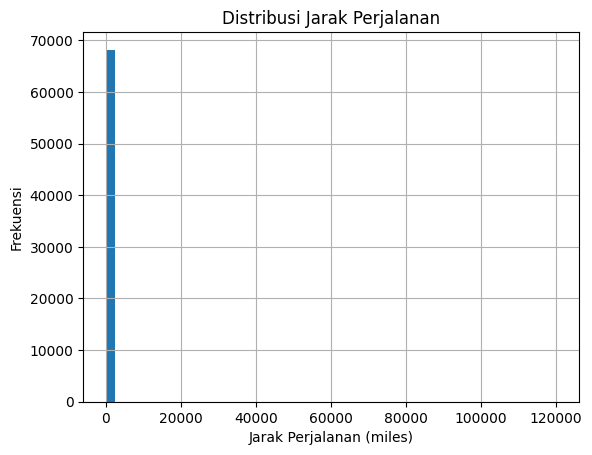

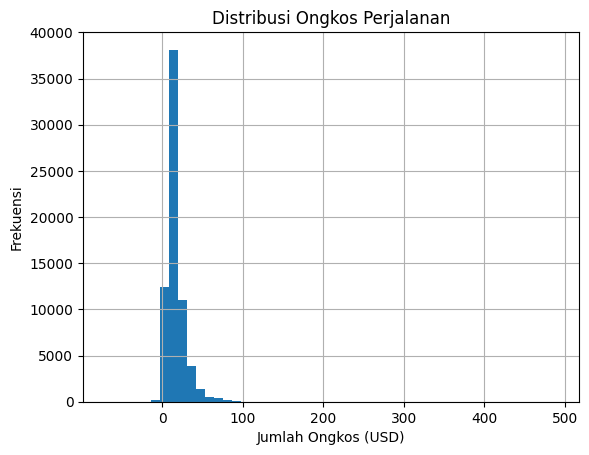

In [12]:
import matplotlib.pyplot as plt

# Plot distribusi untuk variabel numerik
df['trip_distance'].hist(bins=50)
plt.title('Distribusi Jarak Perjalanan')
plt.xlabel('Jarak Perjalanan (miles)')
plt.ylabel('Frekuensi')
plt.show()

df['fare_amount'].hist(bins=50)
plt.title('Distribusi Ongkos Perjalanan')
plt.xlabel('Jumlah Ongkos (USD)')
plt.ylabel('Frekuensi')
plt.show()

# Mempelajari distribusi variabel numerik seperti trip_distance dan fare_amount.
# Mengidentifikasi apakah ada skewness (kemiringan) dalam data, atau adanya outlier yang mempengaruhi distribusi.


## Outliers

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd # Import pandas for DataFrame manipulation
from scipy import stats
import numpy as np

# Assuming 'df' is your original DataFrame, create 'df_cleaned'
df_cleaned = df.copy()  # Create a copy to avoid modifying the original

# Hitung z-score untuk kolom numerik
z = np.abs(stats.zscore(df_cleaned[['trip_distance', 'total_amount']]))
df_cleaned = df_cleaned[(z < 3).all(axis=1)]

## Analisis Korelasi

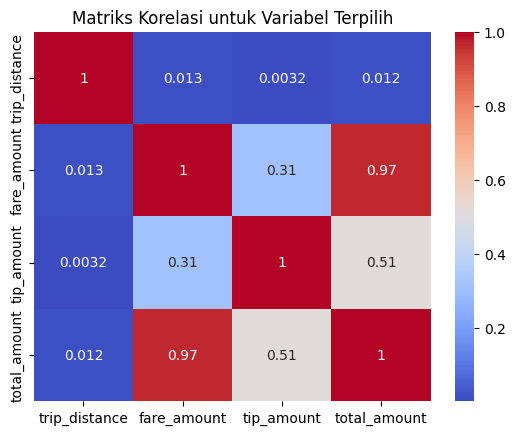

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pilih subset variabel untuk heatmap
subset = df[['trip_distance', 'fare_amount', 'tip_amount', 'total_amount']]

# Hitung matriks korelasi
correlation_matrix = subset.corr()

# Tampilkan heatmap dari matriks korelasi yang lebih kecil
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi untuk Variabel Terpilih')
plt.show()


# Data Cleaning

In [37]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Gabungkan jumlah dan persentase dalam satu dataframe untuk analisis
missing_data = pd.DataFrame({'Jumlah Missing': missing_values, 'Persentase Missing (%)': missing_percentage})

In [39]:
# Mengisi nilai missing dengan mean (Central Tendency) untuk variabel numerik
df['trip_distance'].fillna(df['trip_distance'].mean(), inplace=True)

# Mengisi nilai missing dengan median untuk variabel lain yang memiliki missing values
df['fare_amount'].fillna(df['fare_amount'].median(), inplace=True)


In [ ]:
import matplotlib.pyplot as plt

# Korelasi antara 'total_amount' dan variabel lain
correlation = df.corr()['total_amount'].drop('total_amount')

# Buat bar plot
correlation.plot(kind='bar', figsize=(10, 5))
plt.title('Korelasi antara Total Amount dengan Variabel Lain')
plt.ylabel('Koefisien Korelasi')
plt.show()


In [42]:
df.to_csv('NYC_TLC_Trip_Cleaned.csv', index=False)

# Kesimpulan dan Rekomendasi

Berdasarkan analisis data perjalanan taksi NYC yang dilakukan, berikut adalah kesimpulan utama yang dapat diambil:

1. Distribusi Jarak dan Durasi Perjalanan: Mayoritas perjalanan memiliki jarak antara 1 hingga 3 mil dan berlangsung selama 5 hingga 20 menit. Hal ini menunjukkan bahwa sebagian besar perjalanan taksi di NYC adalah perjalanan jarak pendek yang cepat.

2. Pola Waktu Perjalanan: Puncak perjalanan terjadi pada pagi hari (sekitar jam 8-10) dan sore hari (sekitar jam 17-19), yang konsisten dengan jam sibuk di New York City. Pola ini menyoroti kebutuhan pengelolaan armada yang lebih baik selama jam-jam tersebut untuk menghindari penumpukan penumpang yang menunggu.

3. Hubungan Jarak dan Tarif: Tarif perjalanan secara umum meningkat seiring dengan jarak perjalanan. Namun, ada beberapa outlier yang menunjukkan tarif yang tinggi untuk jarak pendek, yang bisa menimbulkan ketidakpuasan pelanggan.

4. Ketidaksesuaian Tarif: Terdapat variasi yang signifikan dalam tarif yang dikenakan, bahkan untuk perjalanan dengan jarak yang sama. Hal ini menunjukkan adanya ketidakseimbangan dalam penetapan harga yang perlu diselidiki lebih lanjut.

**Rekomendasi Bisnis**
1. Optimasi Operasional

Pengelolaan Armada Selama Jam Sibuk: Perusahaan taksi perlu mengoptimalkan distribusi armada selama jam sibuk pagi dan sore untuk mengurangi waktu tunggu pelanggan. Penggunaan teknologi seperti prediksi permintaan berbasis data dapat membantu dalam penempatan armada yang lebih efisien.

2. Penyesuaian Struktur Tarif

Revisi Struktur Tarif
Peninjauan ulang struktur tarif diperlukan untuk mengatasi ketidakseimbangan harga, terutama dalam menangani outlier yang menunjukkan tarif yang tidak proporsional dengan jarak perjalanan. Struktur tarif yang lebih transparan dan adil dapat meningkatkan kepercayaan dan kepuasan pelanggan.

3. Peningkatan Layanan Pelanggan

Pengembangan Aplikasi Mobile
Investasi dalam pengembangan aplikasi mobile yang memberikan perkiraan waktu tiba yang lebih akurat, serta fitur untuk memantau tarif real-time selama perjalanan, dapat meningkatkan pengalaman pelanggan. Selain itu, memberikan penawaran promosi untuk perjalanan jarak pendek dapat menarik lebih banyak pengguna.


4. Monitoring dan Evaluasi

Evaluasi Berkelanjutan: Perusahaan harus terus memantau dan mengevaluasi dampak dari perubahan yang diterapkan. Data perjalanan baru harus dikumpulkan dan dianalisis secara berkala untuk menyesuaikan strategi operasional dan tarif sesuai dengan dinamika pasar.

Dengan menerapkan rekomendasi ini, perusahaan taksi dapat meningkatkan efisiensi operasional, memastikan penetapan harga yang lebih adil, dan meningkatkan kepuasan pelanggan, yang pada akhirnya akan memperkuat posisi kompetitif mereka di pasar transportasi New York City.